This notebook presents an analysis of the survey data, focusing on key questions such as:

1. What is the overall sentiment towards Muslims as of June 2024? The responses are categorized into three options: good, neutral, and bad.

2. How do groups across different religiions, regions, genders, income and educational levels perceive Muslims?

3. In what ways does knowing a Muslim affect an individual's view of them?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/muslim_brand_jun_2024.csv")

In [3]:
survey= df.copy()

In [4]:
survey= survey.iloc[1:]

In [5]:
survey.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What religious affiliation are you?',
       'Unnamed: 11',
       'How many muslim people have you talked to / with in the last 7 days ?',
       'How do you feel about Muslims people in America',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [6]:
survey.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,What is your level of education?,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,Gender,Age,Major US Region,Device,Household Income
1,1.186364e+11,456809113.0,06/28/2024 12:14:33 AM,06/28/2024 12:14:55 AM,NaN,NaN,NaN,NaN,42e364854ee0d88ae7a54414fc,smc,...,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
2,1.186364e+11,456809113.0,06/28/2024 12:13:39 AM,06/28/2024 12:14:45 AM,NaN,NaN,NaN,NaN,394e663d557cf20dbe029ccb11,smc,...,Graduate school,Facebook,NaN,Very comfortable,Often,male,18_to_29,pacific,android_mobile,175000_to_199999
3,1.186364e+11,456809113.0,06/28/2024 12:14:13 AM,06/28/2024 12:14:32 AM,NaN,NaN,NaN,NaN,7979a63e44103174c29f1e9013,smc,...,High school or less,Facebook,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
4,1.186364e+11,456809113.0,06/28/2024 12:13:51 AM,06/28/2024 12:14:32 AM,NaN,NaN,NaN,NaN,7654f47158c3b05844841ae495,smc,...,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,pacific,android_mobile,175000_to_199999
5,1.186364e+11,456809113.0,06/28/2024 12:12:50 AM,06/28/2024 12:13:14 AM,NaN,NaN,NaN,NaN,85cfb2e16978687e3ae4669696,smc,...,High school or less,Facebook,NaN,Very comfortable,Often,male,18_to_29,NaN,android_mobile,50000_to_74999


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 1 to 109
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Respondent ID                                                            109 non-null    float64
 1   Collector ID                                                             109 non-null    float64
 2   Start Date                                                               109 non-null    object 
 3   End Date                                                                 109 non-null    object 
 4   IP Address                                                               0 non-null      float64
 5   Email Address                                                            0 non-null      float64
 6   First Name                                                               0

In [8]:
# remove columns with all null values
survey= survey.drop(['Respondent ID', 'Collector ID','Email Address', 'First Name','Last Name','IP Address'], axis=1)

In [9]:
survey.rename(columns={'Unnamed: 11': 'Religion_other'}, inplace=True)
survey.rename(columns={'Unnamed: 16': 'News_other'}, inplace=True)

In [10]:
survey.columns

Index(['Start Date', 'End Date', 'Custom Data 1', 'collector_type_source',
       'What religious affiliation are you?', 'Religion_other',
       'How many muslim people have you talked to / with in the last 7 days ?',
       'How do you feel about Muslims people in America',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

# 1. Distribution of Religious Affiliations Amongst Participants

### Metric 1: Sentiment Proportion

In [11]:
c_df = survey['How do you feel about Muslims people in America'].value_counts(normalize=True).reset_index()
c_df.columns = ['Category', 'Percentage']
c_df['Percentage'] *= 100  

In [12]:
print( "Good sentiment:", c_df.loc[0,'Percentage'])
print( "Neutral sentiment:", c_df.loc[1,'Percentage'])
print( "Bad sentiment:", c_df.loc[2,'Percentage'])

Good sentiment: 63.30275229357798
Neutral sentiment: 32.11009174311927
Bad sentiment: 4.587155963302752


In [13]:
ratio = survey['How do you feel about Muslims people in America'].value_counts().reset_index()

positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslims people in America']/\
ratio.loc[2,'How do you feel about Muslims people in America']

In [14]:
positive_to_negative_ratio

13.8

In [15]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]

 
    plt.figure(figsize=(9, 5), dpi=100)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.xticks(rotation=45, ha='right')  

    plt.show()

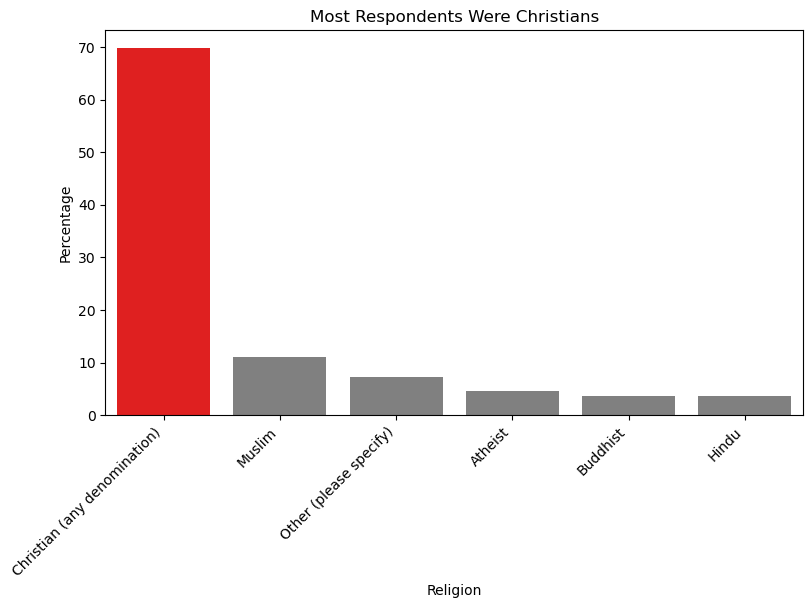

In [16]:
plot_percentages(survey,'What religious affiliation are you?', 'Religion', 'Most Respondents Were Christians')

# 2. Distribution of Sentiments Across All Participants

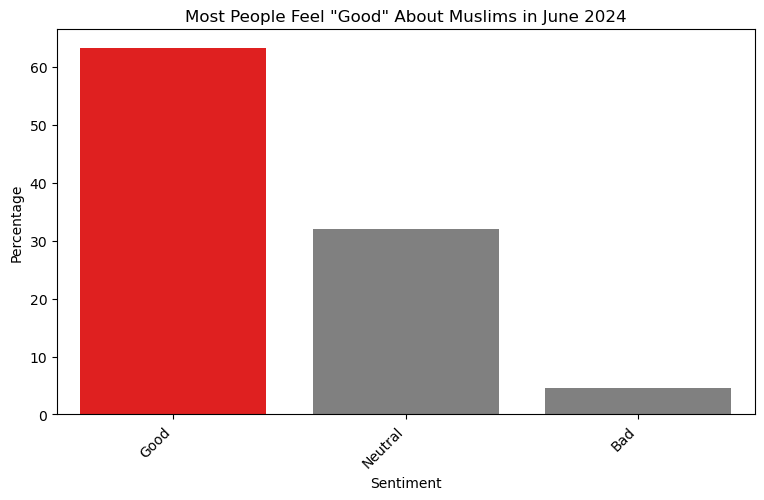

In [17]:
plot_percentages(survey,'How do you feel about Muslims people in America', 'Sentiment', \
                 'Most People Feel "Good" About Muslims in June 2024')

# 3. How Different Religious Groups View Muslims

In [18]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        # Adjust text color for readability
                        fontsize=9)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

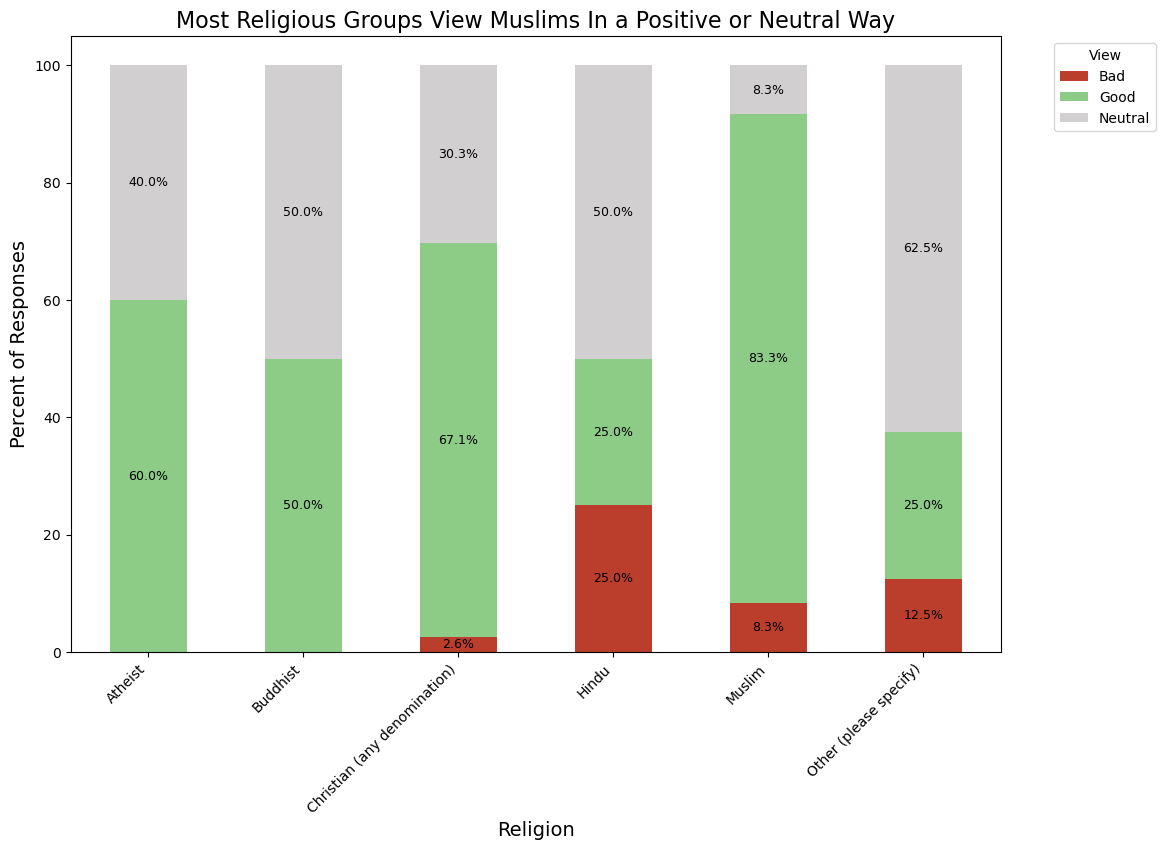

In [19]:
plot_stacked_bar_chart(
    df=survey,  
    title='Most Religious Groups View Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What religious affiliation are you?',
    sent_col='How do you feel about Muslims people in America',
)

In [20]:
survey[survey['What religious affiliation are you?']=='Other (please specify)']['Religion_other'].value_counts()

Agnostic        1
None            1
R               1
Mormon          1
ok              1
Wiccan/Pagan    1
Inclusionist    1
Agnostic        1
Name: Religion_other, dtype: int64

## Observation 1: Majority Positive or Neutral Perceptions Across Religious Backgrounds

Most religious groups have a majority of responses falling under "Good" or "Neutral." This observation supports a general positive or neutral perception among various religious groups. However, some groups (e.g., "Hindu" and "Other") show noticeable proportions of "Bad" responses, with Hindus having the highest proportion of negative views (25% of Hindu responses feel negatively about Muslims)


# 4. How Different Educational Backgrouds View Muslims

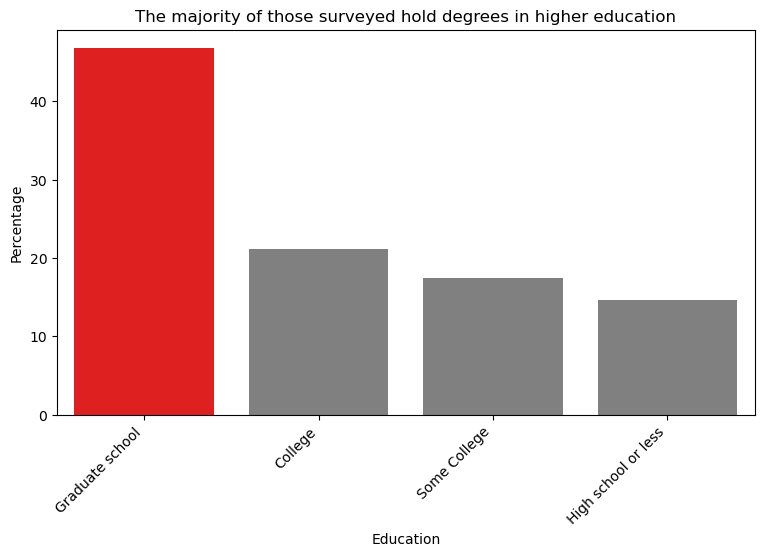

In [21]:
plot_percentages(survey,'What is your level of education?', 'Education',
           'The majority of those surveyed hold degrees in higher education')

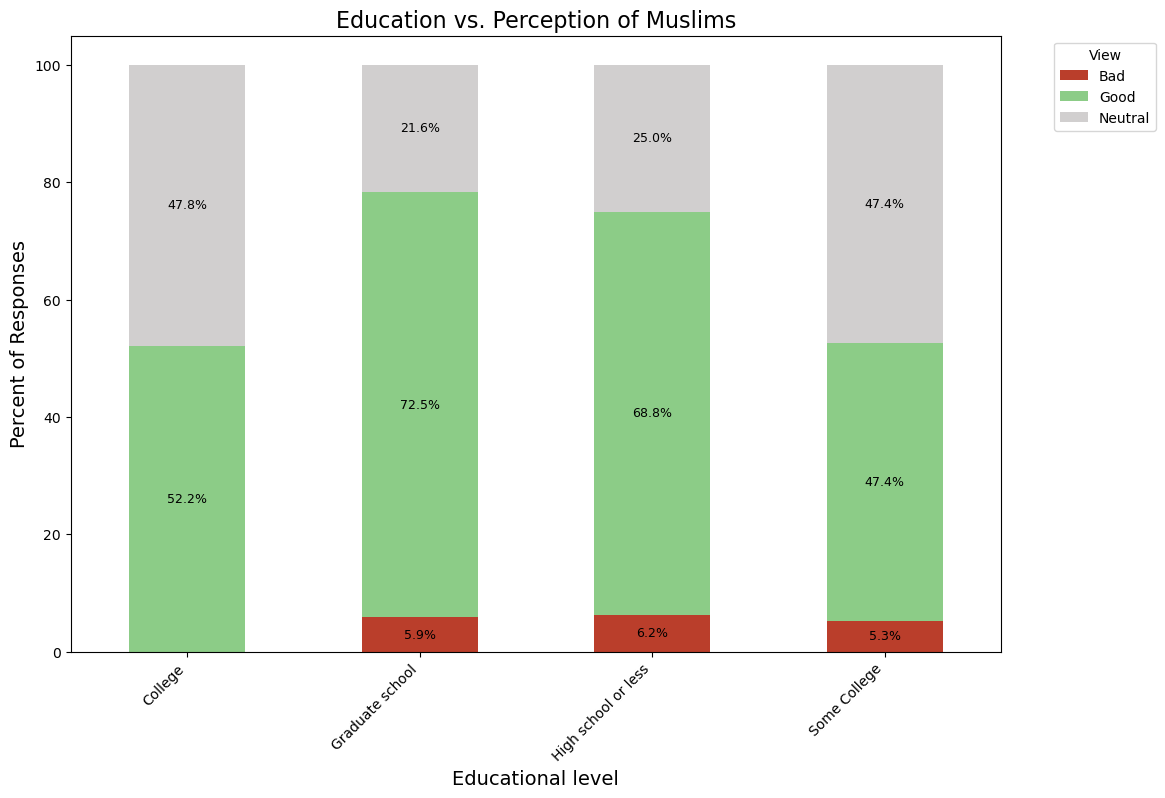

In [22]:
plot_stacked_bar_chart(
    df=survey, 
    title='Education vs. Perception of Muslims',
    xlabel='Educational level',
    ylabel='Percent of Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 2: Majority Positive or Neutral Perceptions Across Educational Levels

Across all education levels, the majority of responses fall under "Good" or "Neutral" perceptions of Muslims, indicating a generally positive or neutral outlook. College educated respondents did not hold any negative views about Muslims.

This consistency across education levels suggests that educational attainment **may not** have a significant impact on perceptions of Muslims.


# 5. How Do Different Age Groups View Muslims

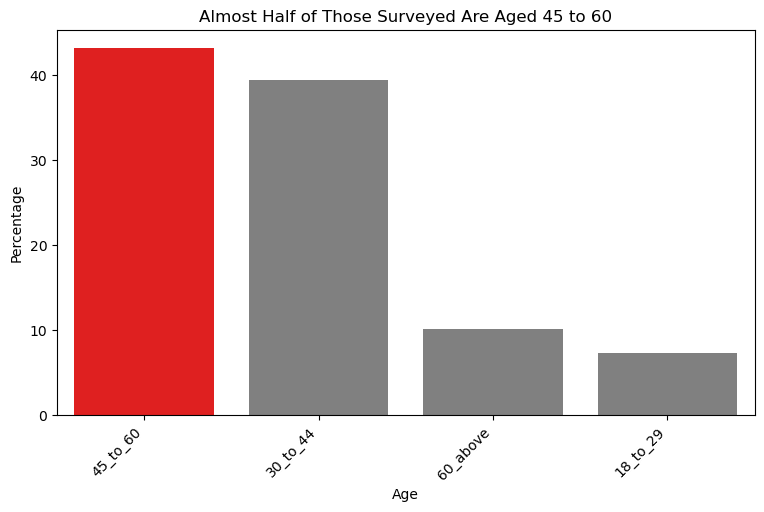

In [23]:
plot_percentages(survey,'Age', 'Age',
           'Almost Half of Those Surveyed Are Aged 45 to 60')

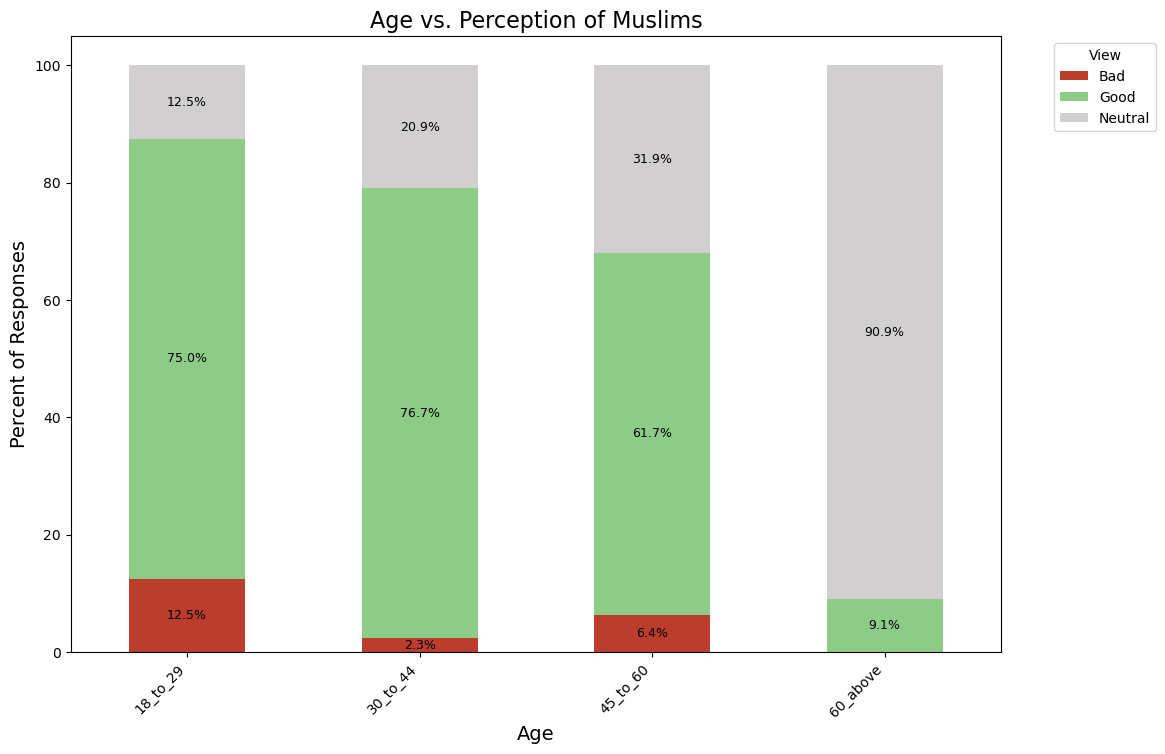

In [24]:
plot_stacked_bar_chart(
    df=survey, 
    title='Age vs. Perception of Muslims',
    xlabel='Age',
    ylabel='Percent of Responses',
    cat_col='Age',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 3: Positive or Neutral Perceptions Across Age Groups

Across all age groups, the majority of responses fall under "Good" or "Neutral," indicating a generally positive or neutral outlook toward Muslims.
The youngest group (18 to 29) shows a slightly higher percentage of "Bad" responses compared to the other age groups, but it remains a small minority within that group. Respondents aged 60 or older, hold the smallest proprortion of "Good" responses but also have no negative perceptions

# 6. How Do Different Income Groups View Muslims

In [25]:
income_mapping = {
    '125000_to_149999': '125k_149k',
    '25000_to_49999': '25k_49k',
    '150000_to_174999': '150k_174k',
    '175000_to_199999': '175k_199k',
    '50000_to_74999': '50k_74k',
    '100000_to_124999': '100k_124k',
    '0_to_9999': '0_9k',
    '200000_and_up': '200k_and_up',
    '75000_to_99999': '75k_99k',
    '10000_to_24999': '10k_24k'
}

survey['Household Income'] = survey['Household Income'].replace(income_mapping)

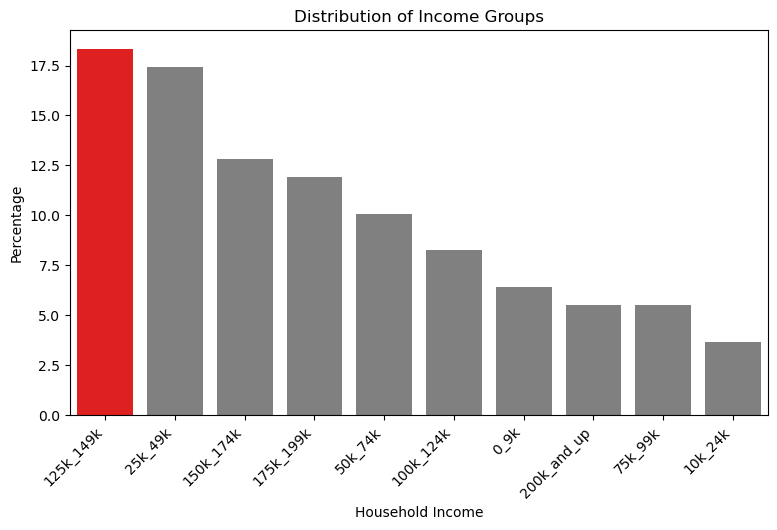

In [26]:
plot_percentages(survey,'Household Income', 'Household Income',
           'Distribution of Income Groups')

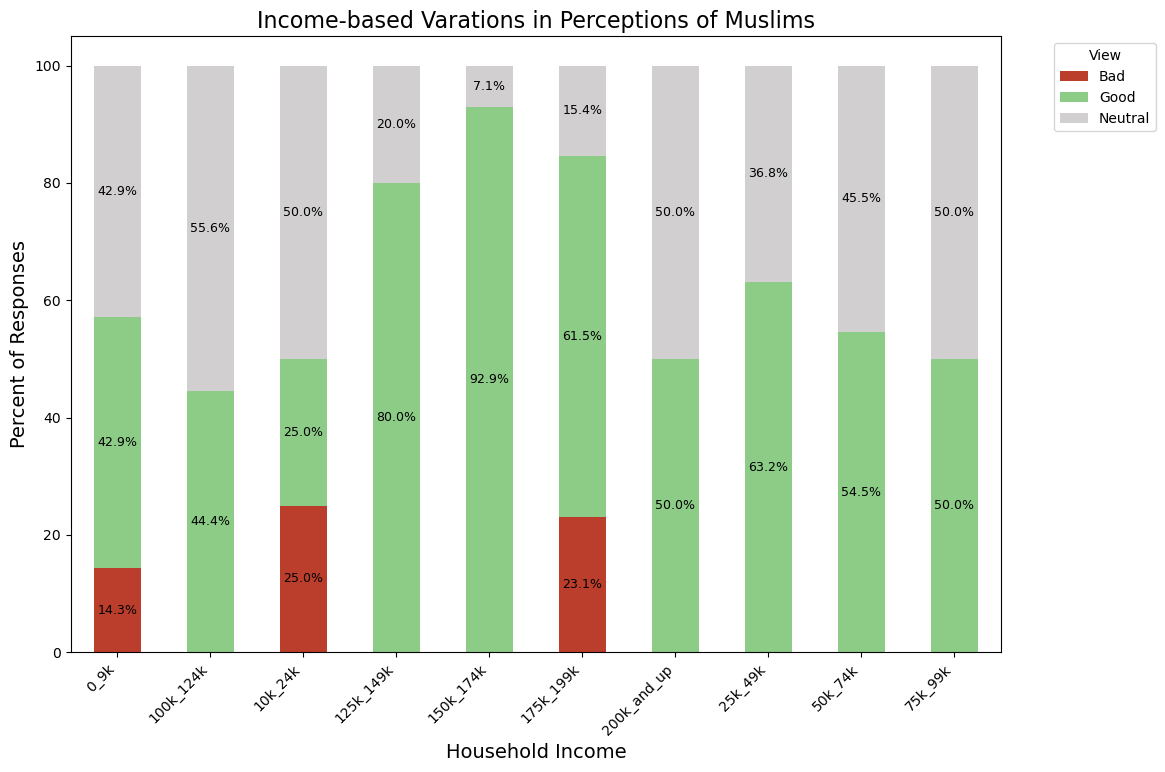

In [27]:
plot_stacked_bar_chart(
    df=survey, 
    title='Income-based Varations in Perceptions of Muslims',
    xlabel='Household Income',
    ylabel='Percent of Responses',
    cat_col='Household Income',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 4: 

Some negative responses ("Bad") are present in the lower income group (e.g., "0-9k" and "10k-24k") and in specific mid-income brackets (e.g., "175k-199k").

This could suggest that perceptions vary slightly by income level, with certain income groups expressing a small but noticeable proportion of negative views

# 7. How Do Different Regions View Muslims

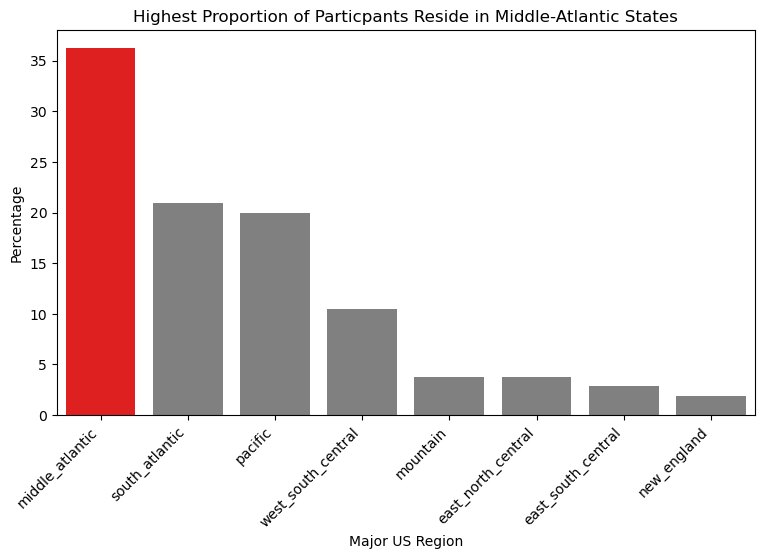

In [28]:
plot_percentages(survey,'Major US Region', 'Major US Region',
                 'Highest Proportion of Particpants Reside in Middle-Atlantic States')

**Middle-Atlantic**: Its exact definition differs by source, but the region typically includes New Jersey, Maryland, Virginia, Delaware, West Virginia, District of Columbia, and Pennsylvania (sometimes New York)

**South-Atlantic**: Kentucky, North Carolina, South Carolina, Tennessee

**Pacific**: Alaska, California, Hawaii, Oregon, and Washington

**West-South-Central**:Arkansas, Louisiana, Oklahoma, and Texas

**Mountain**: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming

**East-South-Central**: Illinois, Indiana, Michigan, Ohio, Wisconsin 

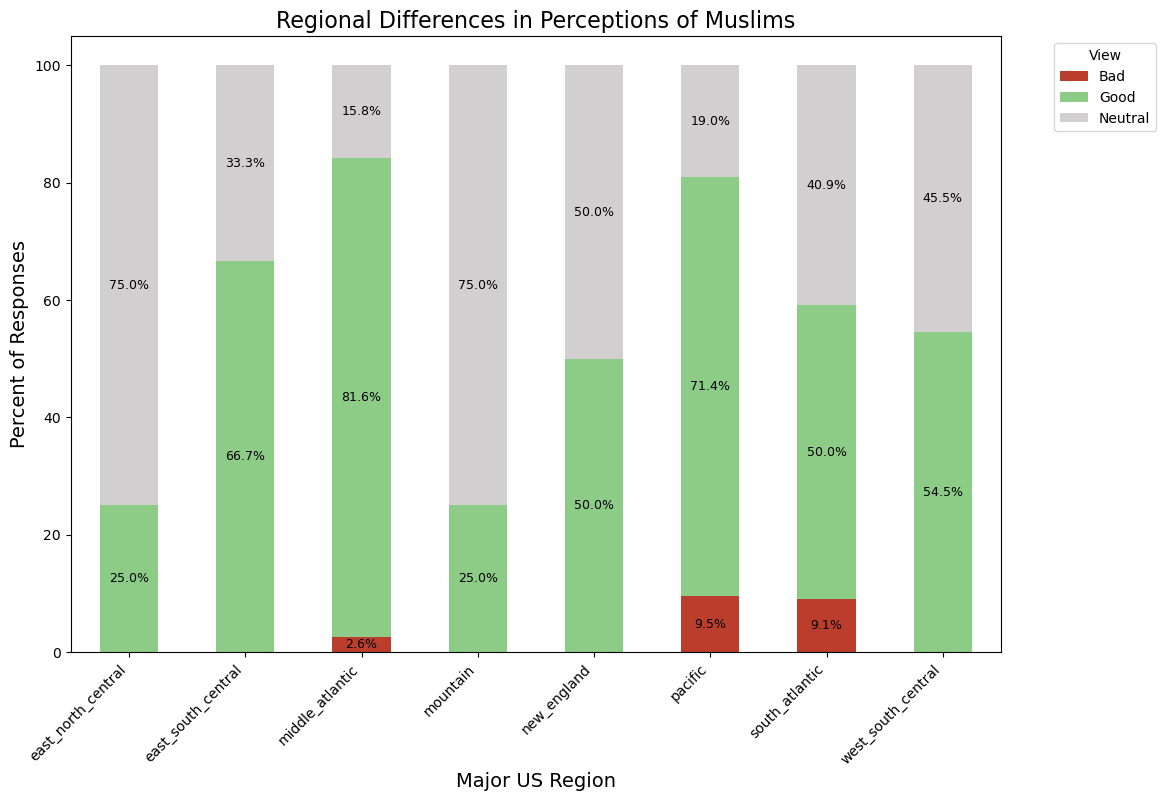

In [29]:
plot_stacked_bar_chart(
    df=survey, 
    title='Regional Differences in Perceptions of Muslims',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 5:

In most U.S. regions, the majority of respondents have either "Good" or "Neutral" views of Muslims.

Regions such as the "East-South-Central" ( Illinois, Indiana, Michigan, Ohio, Wisconsin), "West South Cental"(Arkansas, Louisiana, Oklahoma, and Texas), and "New England" show especially high proportions of "Good" responses with no "Bad" responses.

It is worth stating that there is a notable negative sentiment in certain regions; the "Middle Atlantic" (New Jersey, Maryland, Virginia, Delaware, West Virginia, District of Columbia, and Pennsylvania (sometimes New York)) "South Atlantic" (Kentucky, North Carolina, South Carolina, Tennessee), and "Pacific" regions show a small but noticeable proportion of "Bad" responses. 

It's also important to state that although the middle atlantic region is one of the few regions to have negative perceptions, they represent the highest proportion of positive views across all the regions

This variation suggests that certain regions may have slightly more negative perceptions compared to others, though these remain a minority.



# 5. Relationship between knowing a Muslim and Sentiment

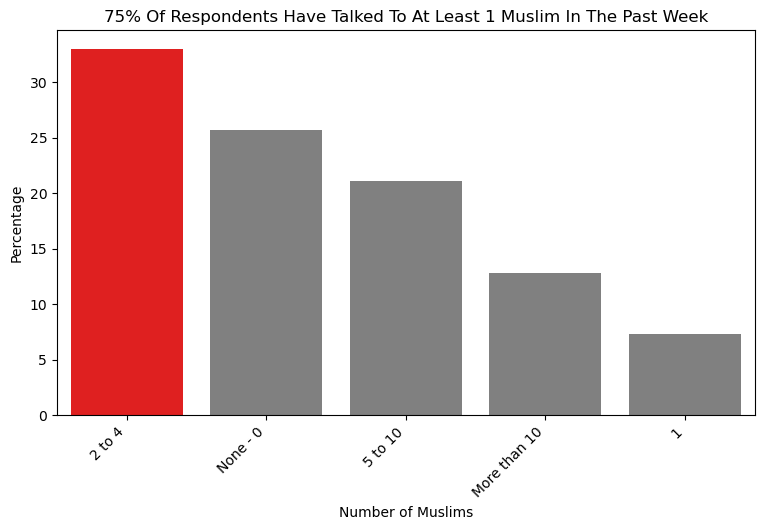

In [34]:
plot_percentages(survey,'How many muslim people have you talked to / with in the last 7 days ?', 'Number of Muslims',\
           '75% Of Respondents Have Talked To At Least 1 Muslim In The Past Week')

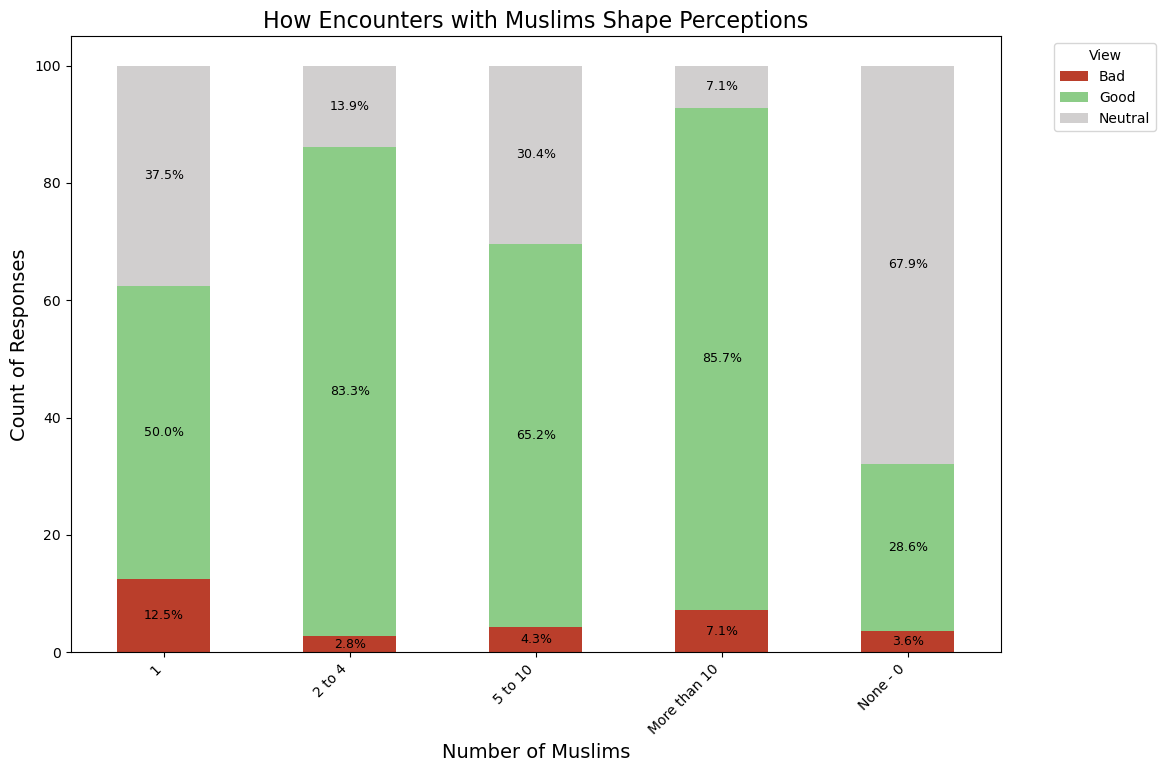

In [35]:
plot_stacked_bar_chart(
    df=survey, 
    title='How Encounters with Muslims Shape Perceptions',
    xlabel='Number of Muslims',
    ylabel='Count of Responses',
    cat_col='How many muslim people have you talked to / with in the last 7 days ?',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 6

1) Strong Positive Correlation with Increased Encounters:

The proportion of "Good" responses **generally** increases as the number of encounters rises, with the highest proportion of positive views (85.7%) seen in the "More than 10" encounters group. However, there was a dip in positive views when moving from the 2-4 (83.3%) encounters group to the 5-10 encounters groups (65.2%).

This suggests that frequent interactions with Muslims are associated with the most positive perceptions.

2) Moderate Encounters Also Correlate with Positive Views:

The "2 to 4" encounters group has a high proportion of positive views (83.3%), though it's slightly lower than the "More than 10" group. This indicates that even a moderate level of encounters is associated with a favorable perception, though the effect continues to strengthen with more frequent interactions.

3) Lower Positive Sentiment with Fewer or No Encounters:

The "1" and "None - 0" groups have lower proportions of "Good" responses (50% and 28.6%, respectively) and higher "Neutral" or "Bad" responses. This suggests that limited or no interaction may be linked to less favorable or more neutral views.

**Conclusion**:

The data suggests a strong positive correlation between the frequency of encounters with Muslims and favorable perceptions. Respondents with 'More than 10' encounters report the highest proportion of positive views (85.7%), while those with fewer or no encounters show more neutral or negative sentiments. This trend implies that frequent interactions are most effective in fostering positive perceptions.

In [36]:
survey['interaction_group'] = survey['How many muslim people have you talked to / with in the last 7 days ?'].\
apply(lambda x: 'Had interactions' if x != 'None - 0' else 'No interactions')

In [37]:
grouped = survey.groupby(['interaction_group', 'How do you feel about Muslims people in America']).\
size().reset_index(name='count')

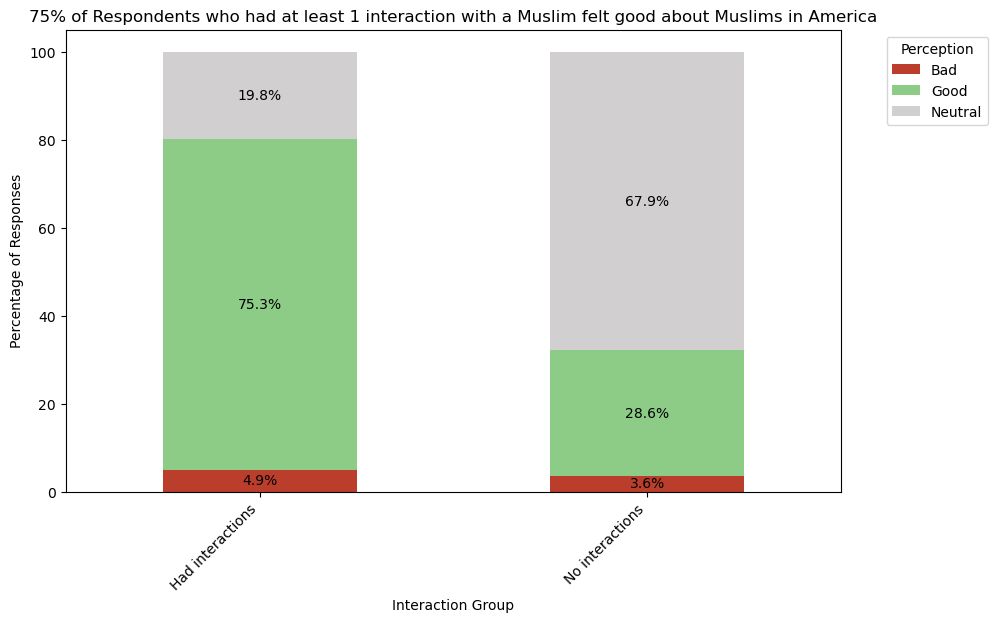

In [44]:
totals = grouped.groupby('interaction_group')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / totals) * 100

pivot_table = grouped.pivot(index='interaction_group', 
                            columns='How do you feel about Muslims people in America', 
                            values='percentage').fillna(0)


colors = ['#ba3e2b', '#8ccc87','#d1cfcf']  


ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)


plt.title('75% of Respondents who had at least 1 interaction with a Muslim felt good about Muslims in America')
plt.xlabel('Interaction Group')
plt.ylabel('Percentage of Responses')


for i, interaction_group in enumerate(pivot_table.index):
    cumulative_percentage = 0  
    for j, sentiment in enumerate(pivot_table.columns):
        percentage = pivot_table.loc[interaction_group, sentiment]
        if percentage > 0:
            ax.text(
                i, cumulative_percentage + (percentage / 2),  
                f"{percentage:.1f}%", 
                ha='center', va='center', color='black', fontsize=10
            )
            cumulative_percentage += percentage  
plt.xticks(rotation=45, ha='right')

plt.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Observation 7

75.3% of respondents who had interactions with Muslims reported a "Good" perception, compared to only 28.6% in the "No interactions" group. This suggests that direct interactions are associated with more favorable views.

Meanwhile, respondents with no interactions show a significant proportion of "Neutral" perceptions at 67.9%, much higher than the 19.8% in the "Had interactions" group.

This may indicate that those without interactions are more likely to remain neutral, possibly due to limited exposure or knowledge.

Overall, there were low levels of negative perception across all groups. Both groups have relatively low percentages of "Bad" responses, with 4.9% for those with interactions and 3.6% for those without. This shows that negative views are generally uncommon, regardless of interaction level.


# 6. Relationship Between Primary News Sources and Public Sentiment

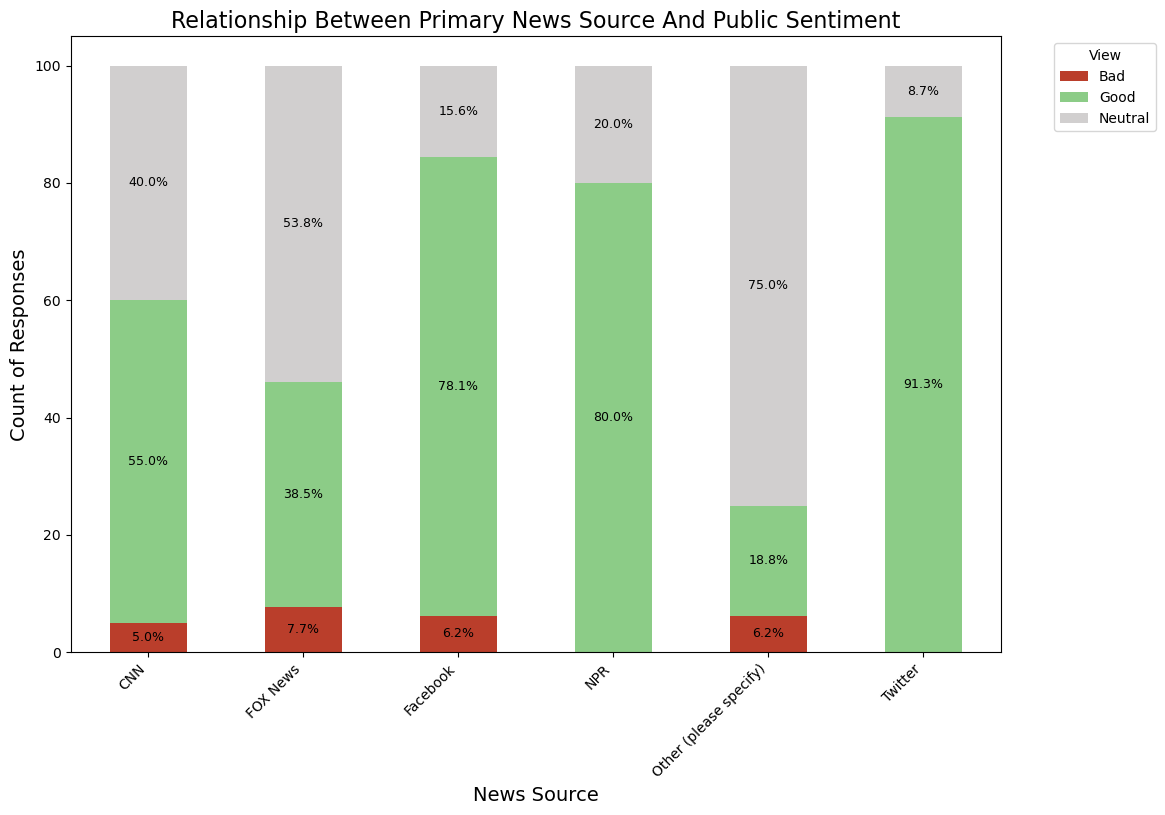

In [46]:
plot_stacked_bar_chart(
    df=survey, 
    title='Relationship Between Primary News Source And Public Sentiment',
    xlabel='News Source',
    ylabel='Count of Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslims people in America'
)

In [50]:
survey[survey['Where do you get your news from?']== 'Other (please specify)']['News_other']

8                                   apple and yahoo news
15                                I don’t watch any news
21                                            Local news
42                                               Tik tok
62                                                    Hi
63                                cbs local news-morning
72           Local news, national television affiliates 
73                                      Multiple sources
80                                               YouTube
82                                  radio, news webpages
87                                       Aggregated news
89                                                    ok
90                                            local news
93     My MOMM as she is a News 📰 🗞️ junkie and tells...
103           Rarely listen to the news; talk to friends
105                                             ABC News
Name: News_other, dtype: object

## Observation 8


Twitter users report the highest proportion of "Good" responses at 91.3%, followed by NPR users at 80%.
This indicates that respondents who primarily get their news from Twitter and NPR tend to have more positive perceptions.

Facebook users report 78.1% "Good" responses, which, while high, is lower than the positive sentiment reported by Twitter and NPR users.
This places Facebook in a middle position among the sources, leaning positive but not as strongly as Twitter or NPR.

CNN and Fox News have higher proportions of "Neutral" responses, at 40% and 53.8%, respectively.
This suggests that viewers of these traditional news sources are more likely to hold neutral views.

Negative sentiment remains low across all sources, with slightly higher "Bad" responses for Fox News (7.7%) and Other (News from friends and family, local news, youtube Tik Tok, Apple and Yahoo News) (6.2%), though the numbers are generally minimal.

**Conclusion**:

The data suggests that primary news sources are associated with differing perceptions of Muslims. 
Twitter users show the highest level of positive sentiment, with 91.3% of responses marked as 'Good,' followed closely by NPR users at 80%. Facebook users also exhibit a predominantly positive view, though to a slightly lesser degree (78.1%). Traditional news sources like CNN and Fox News tend to yield more neutral responses, with Fox News also showing a slightly elevated level of negative sentiment

# 7. Relationship between Gender and Sentiment

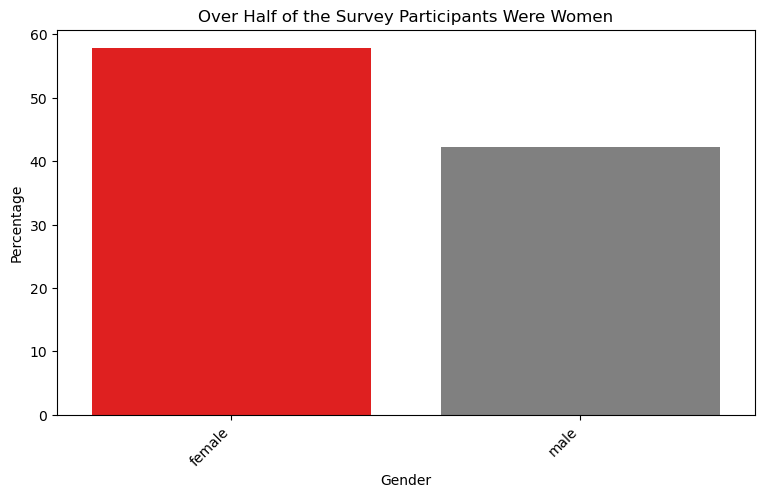

In [54]:
plot_percentages(survey,'Gender', 'Gender',
           'Over Half of the Survey Participants Were Women')

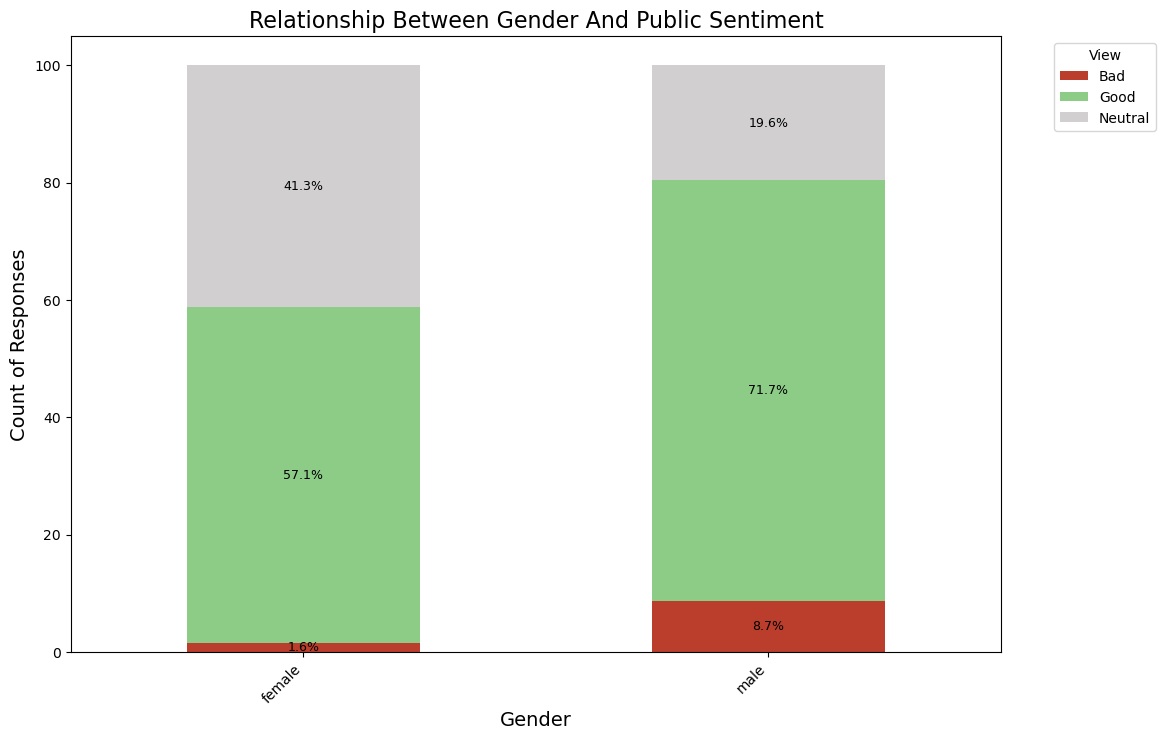

In [57]:
plot_stacked_bar_chart(
    df=survey, 
    title='Relationship Between Gender And Public Sentiment',
    xlabel='Gender',
    ylabel='Count of Responses',
    cat_col= 'Gender',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 9

The data suggests that men are more likely to hold positive views of Muslims, with 71.7% of male respondents indicating a 'Good' perception, compared to 57.1% of female respondents. Women, however, are more likely to remain neutral, with 41.3% expressing a 'Neutral' view. Negative sentiment remains low among both genders, with slightly higher proportions among men

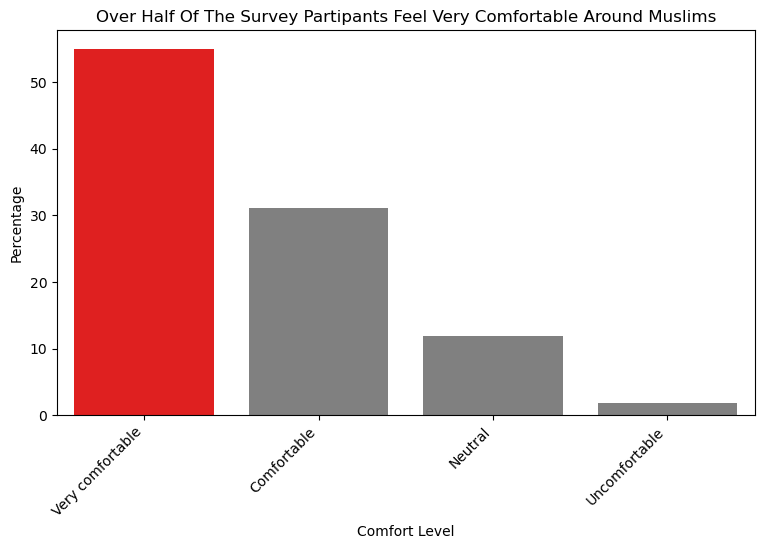

In [62]:
plot_percentages(survey, 'How comfortable do you feel interacting with Muslims in your community?', \
                 'Comfort Level', 'Over Half Of The Survey Partipants Feel Very Comfortable Around Muslims')

In [69]:
def plot_bar (df, category_col, comfort_level, title,xlabel, y_label):   
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')


    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#d62728',  # Red for Very Comfortable
        'Comfortable': '#7f7f7f',       # Grey for Comfortable
        'Neutral': '#bcbd22',           # Yellow for Neutral
        'Uncomfortable': '#1f77b4',     # Blue for Uncomfortable
        'Very uncomfortable': '#ff7f0e' # Orange for Very Uncomfortable
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, religion in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[religion, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage

    plt.show()

In [71]:
plot_bar(
    df= survey, 
    category_col= 'What religious affiliation are you?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Relationship Between Gender And Public Sentiment',
    xlabel='Gender',
    ylabel='Count of Responses',
)

TypeError: plot_bar() got an unexpected keyword argument 'xlabel'